In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the data using python pandas library**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Indian_Kids_Screen_Time.csv")

## **Display the first five records of our data to see the data format**

In [ ]:
df.head(5)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


**This function gives the shape of the data that is no.of rows and columns**

In [ ]:
df.shape

(9712, 8)

**This function gives info() about our data i.e datatypes of each columns,total non-null values in each columns**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


**Describe() function  gives the statistical measures of the data.By this we can see the count,mean,std,etc.values which gives us some insights about our data**

In [ ]:
df.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


**tail() defaultly shows last 5 records**

In [ ]:
df.tail(5)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban
9711,15,Female,6.12,TV,True,0.33,Anxiety,Urban


**This code calculates and prints the total number of missing (null) values in the entire DataFrame**

In [ ]:
print(df.isnull().sum().sum())

3218


**This function sum the null values of each columns seperately and show it to us. From this we can see that only health_impacts columns has null values. So we can replace those missing values if we want**

In [ ]:
print(df.isnull().sum())

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


**this function shows if any duplicate rows are there in our data. If any we can remove that column so that memory usage reduces and data redundancy removes**

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9707,False
9708,False
9709,False
9710,False


 this retrives our desired rows from our desired

In [ ]:
df1=df [["Avg_Daily_Screen_Time_hr", "Primary_Device"]][0:10:1]
df1

,Avg_Daily_Screen_Time_hr,Primary_Device
0,3.99,Smartphone
1,4.61,Laptop
2,3.73,TV
3,1.21,Laptop
4,5.89,Smartphone
5,4.88,Smartphone
6,2.97,TV
7,2.74,TV
8,4.61,Laptop
9,3.24,Tablet


**This code changes the data type of the columns ‘Gender’ and ‘Urban_or_Rural’ from object (string) type to categorical type.**

In [ ]:
df['Gender']=df['Gender'].astype('category')
df['Urban_or_Rural']=df['Urban_or_Rural'].astype('category')
print(df)

      Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0      14    Male                      3.99     Smartphone   
1      11  Female                      4.61         Laptop   
2      18  Female                      3.73             TV   
3      15  Female                      1.21         Laptop   
4      12  Female                      5.89     Smartphone   
...   ...     ...                       ...            ...   
9707   17    Male                      3.26     Smartphone   
9708   17  Female                      4.43     Smartphone   
9709   16    Male                      5.62     Smartphone   
9710   17    Male                      5.60             TV   
9711   15  Female                      6.12             TV   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                           True                               0.42   
1                           True                               0.30   
2                           True          

**Univariate Analysis**

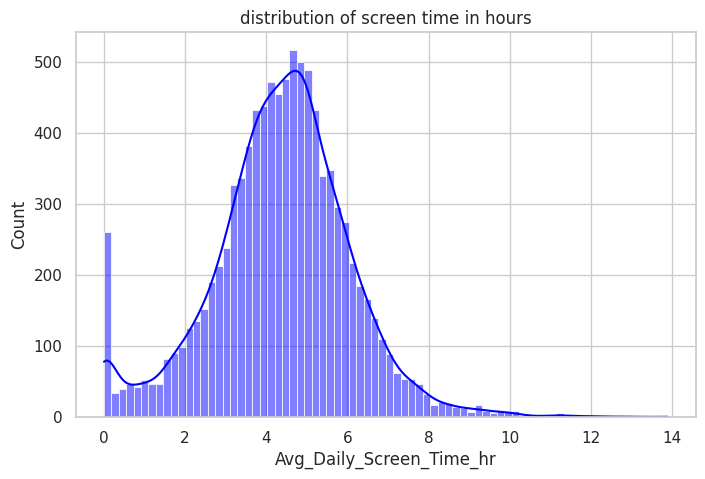

In [ ]:
#Histigram
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df['Avg_Daily_Screen_Time_hr'],kde=True,color="blue")
plt.title("distribution of screen time in hours")
plt.show()

This graph shows the distribution of users'**average daily screen time in hours**.
It helps us understand how many users spend more or less time on screens.
The KDE line shows the overall trend of screen usage

**Count Plot of Users by Gender and Location**
 **This graph shows how many users belong to each gender category and whether they live in urban or rural areas.
It helps compare male and female users across different locations.
Different colors represent Urban and Rural categories.**

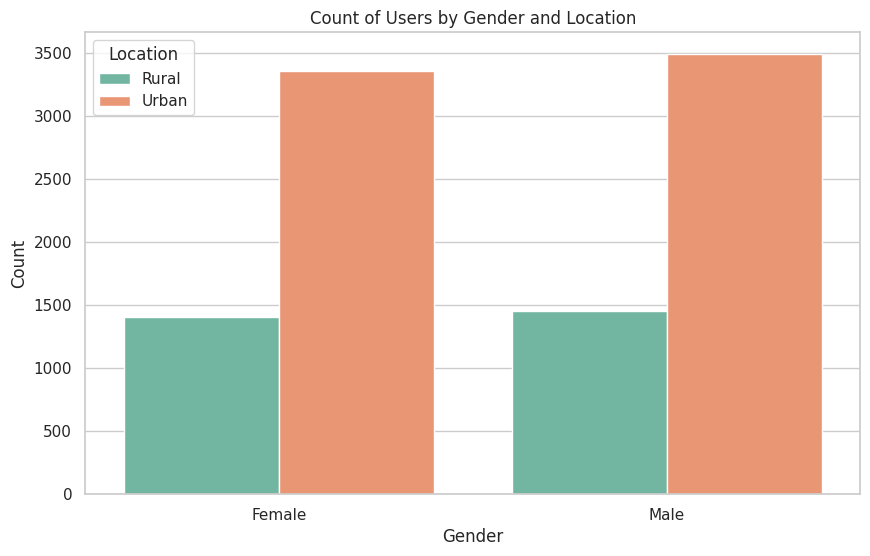

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x="Gender",
    hue="Urban_or_Rural",
    palette="Set2"
)
plt.title("Count of Users by Gender and Location")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Location")
plt.show()

**Count Plot by Gender, Location, and Device Type**
**This graph shows the number of users based on Gender and their Urban/Rural location,divided by their Primary Device type.  
Each column represents a different device, helping us compare usage patterns
between males and females across Urban and Rural areas for each device type.**

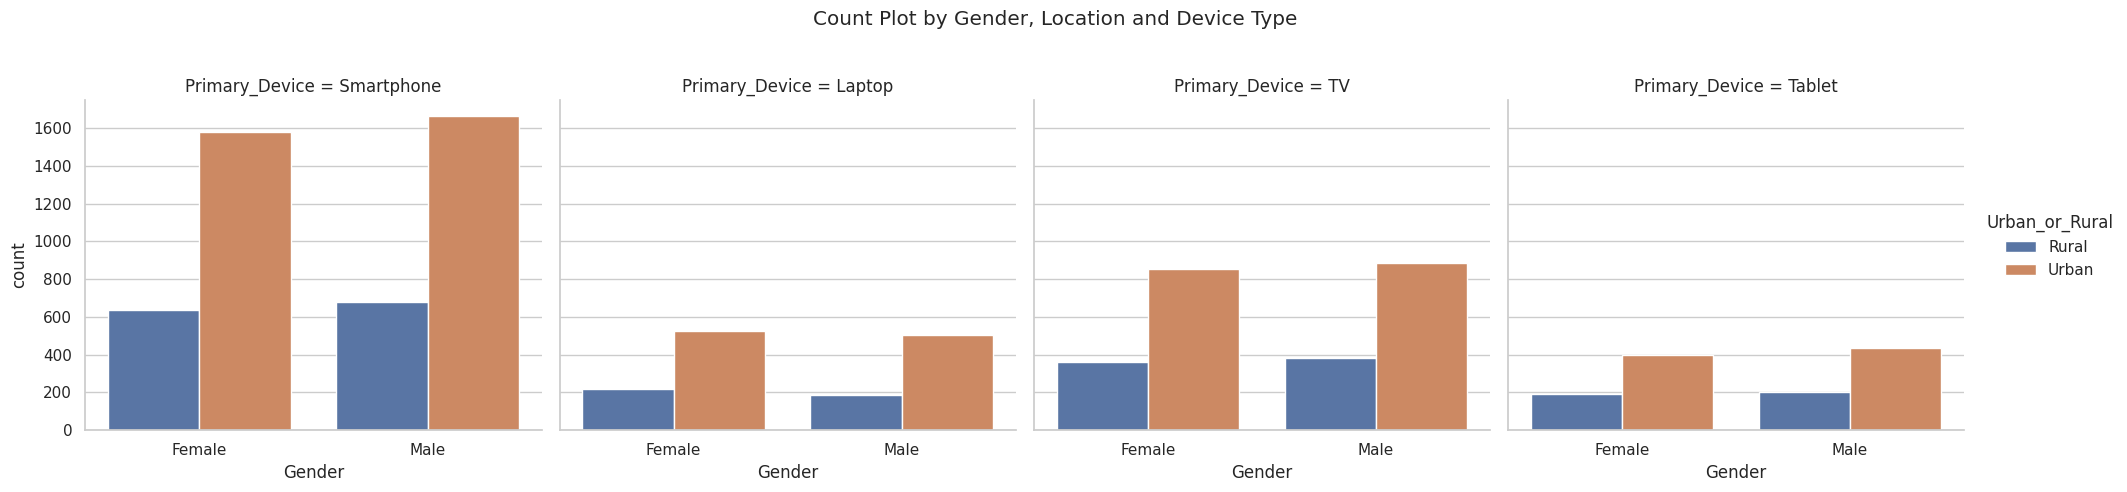

In [ ]:
sns.catplot(
    data=df,
    x="Gender",
    hue="Urban_or_Rural",
    col="Primary_Device",
    kind="count",
    height=5,
    aspect=1
)
plt.subplots_adjust(top=0.8)
plt.suptitle("Count Plot by Gender, Location and Device Type")
plt.show()

**Violin Plot of Screen Time by Gender and Age**
**This graph shows the distribution of screen time for different genders and age groups.  
The shape of each violin represents how the screen time values are spread out.  
The quartile lines inside show the median and data spread.  
By comparing the violins, we can see how screen time varies between males and females across different ages.**

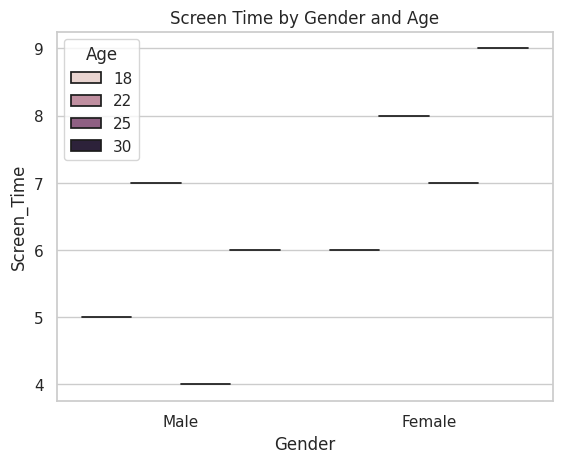

In [ ]:
data = {
    "Gender": ["Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female"],
    "Age": [18, 18, 22, 22, 25, 25, 30, 30],
    "Screen_Time": [5, 6, 7, 8, 4, 7, 6, 9]
}
df = pd.DataFrame(data)
sns.violinplot(
    data=df,
    x="Gender",
    y="Screen_Time",
    hue="Age",
    split=True,
    inner="quartile"
)
plt.title("Screen Time by Gender and Age")
plt.show()

**Violin Plot of Average Daily Screen Time by Gender and Age**
**This plot shows how the average daily screen time varies among different genders and age groups.  
Each violin shape represents the distribution of screen time within each gender, while the colors show different age groups.  
The quartile lines inside indicate the median and data spread.  
It helps us compare how much time males and females of different ages spend on screens.**

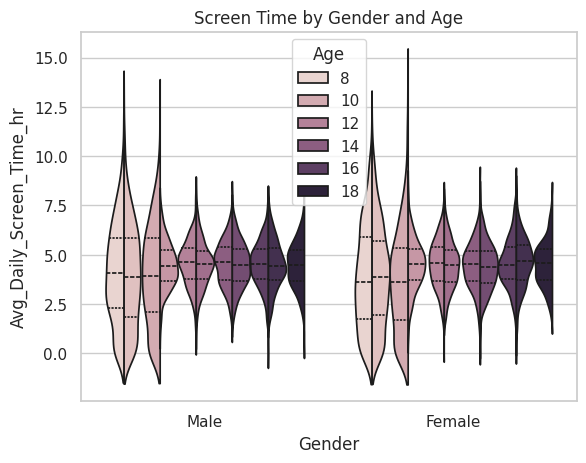

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Indian_Kids_Screen_Time.csv")
sns.violinplot(
    data=df,
    x="Gender",
    y="Avg_Daily_Screen_Time_hr",
    hue="Age",
    split=True,
    inner="quartile"
)
plt.title("Screen Time by Gender and Age")
plt.show()

**Boxplot of Screen Time by Gender**

/tmp/ipython-input-1277156267.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Avg_Daily_Screen_Time_hr", data=df, palette="Set2")


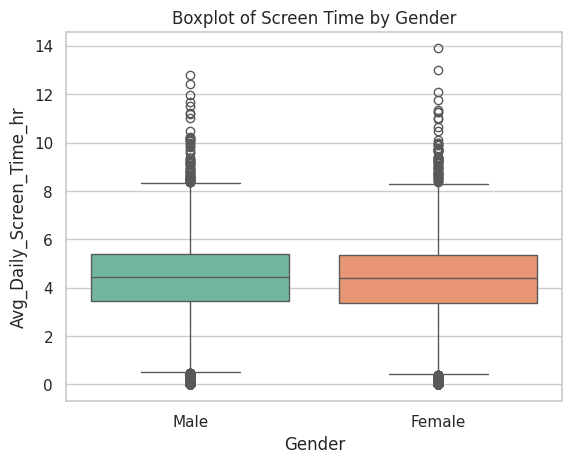

In [ ]:
sns.boxplot(x="Gender", y="Avg_Daily_Screen_Time_hr", data=df, palette="Set2")
plt.title("Boxplot of Screen Time by Gender")
plt.show()

 **Histogram and KDE Plots for Screen Time and Age**


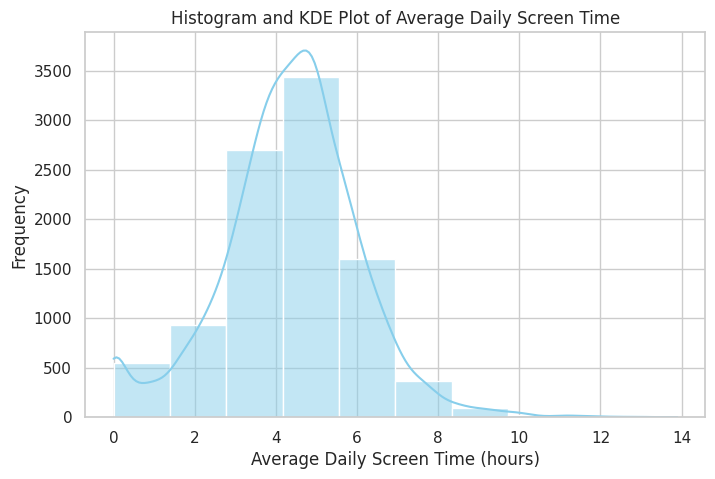

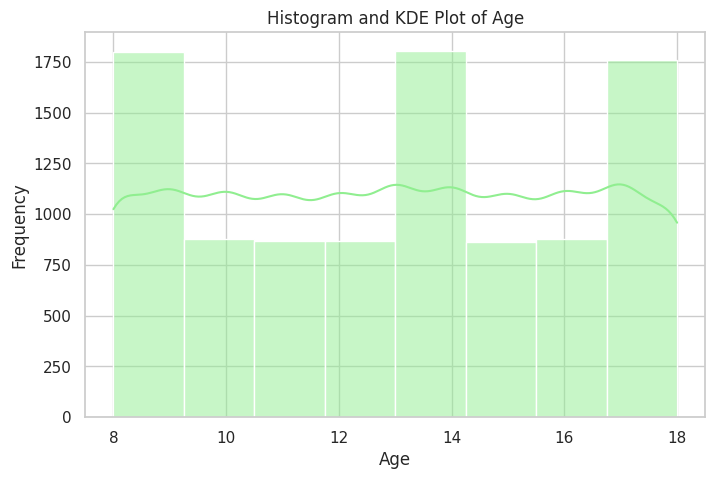

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(df["Avg_Daily_Screen_Time_hr"], kde=True, color="skyblue", bins=10)
plt.title("Histogram and KDE Plot of Average Daily Screen Time")
plt.xlabel("Average Daily Screen Time (hours)")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], kde=True, color="lightgreen", bins=8)
plt.title("Histogram and KDE Plot of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

**Scatter Plot of Age vs Average Daily Screen Time by Gender**

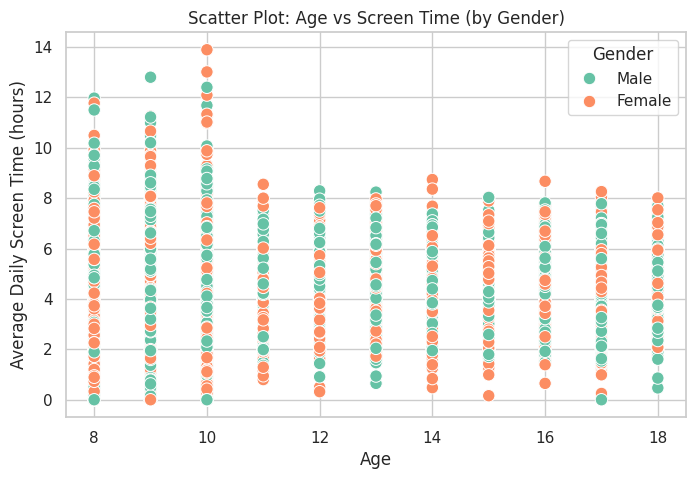

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="Age",
    y="Avg_Daily_Screen_Time_hr",
    hue="Gender",
    palette="Set2",
    s=80
)
plt.title("Scatter Plot: Age vs Screen Time (by Gender)")
plt.xlabel("Age")
plt.ylabel("Average Daily Screen Time (hours)")
plt.show()

**Grouped Bar Plot of Screen Time by Location and Gender**


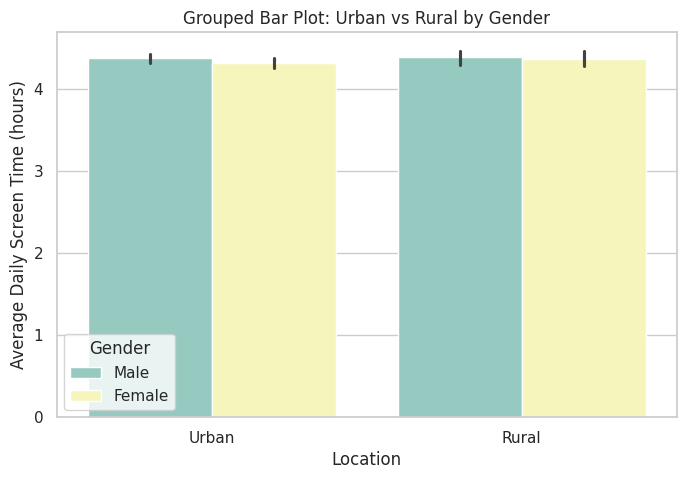

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="Urban_or_Rural",
    y="Avg_Daily_Screen_Time_hr",
    hue="Gender",
    palette="Set3"
)
plt.title("Grouped Bar Plot: Urban vs Rural by Gender")
plt.xlabel("Location")
plt.ylabel("Average Daily Screen Time (hours)")
plt.show()

**FacetGrid Histogram of Screen Time by Device Type and Gender**

<Figure size 800x500 with 0 Axes>

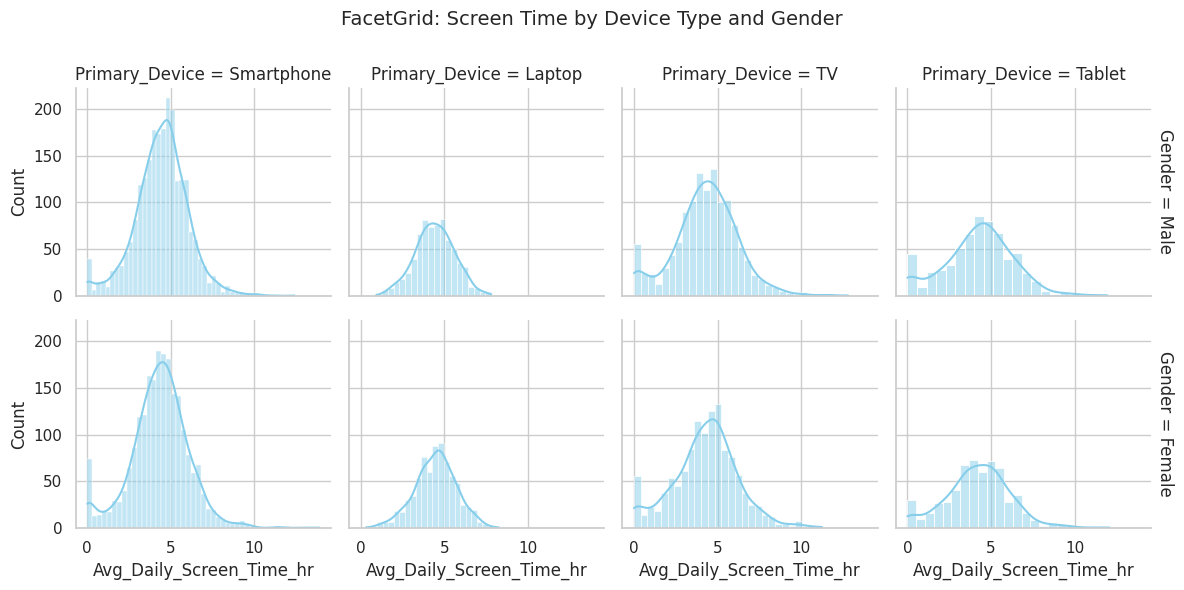

In [ ]:
plt.figure(figsize=(8,5))
g = sns.FacetGrid(df, col="Primary_Device", row="Gender", margin_titles=True)
g.map_dataframe(sns.histplot, x="Avg_Daily_Screen_Time_hr", kde=True, color="skyblue")
g.fig.suptitle("FacetGrid: Screen Time by Device Type and Gender", fontsize=14)
plt.subplots_adjust(top=0.85)
plt.show()

**Pairplot of Numerical Variables by Gender**

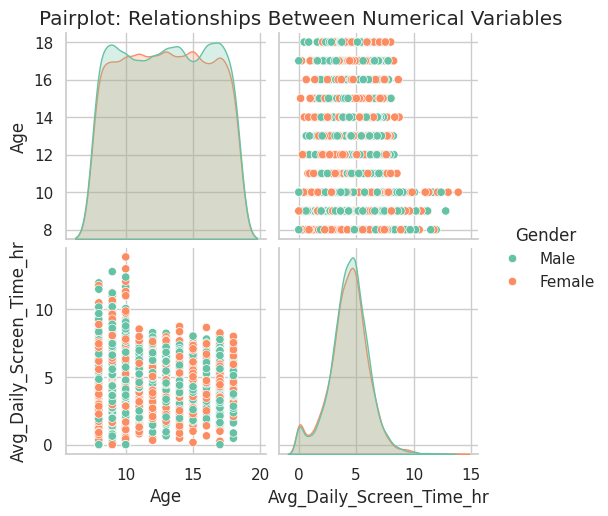

In [ ]:
numeric_cols = ["Age", "Avg_Daily_Screen_Time_hr"]
sns.pairplot(df, vars=numeric_cols, hue="Gender", palette="Set2")
plt.suptitle("Pairplot: Relationships Between Numerical Variables", y=1.02)
plt.show()

**Heatmap of Correlation Between Age and Screen Time**

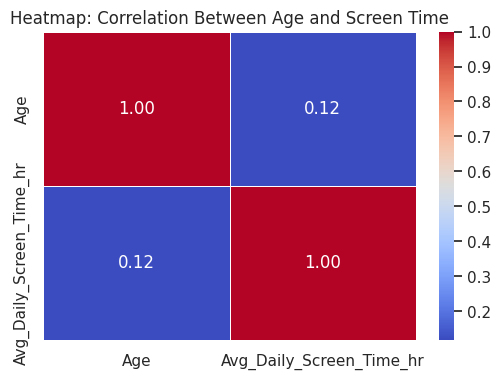

In [ ]:
numeric_cols = ["Age", "Avg_Daily_Screen_Time_hr"]
numeric_df = df[numeric_cols]
corr = numeric_df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap: Correlation Between Age and Screen Time")
plt.show()

**Histogram of Average Daily Screen Time by Gender
This histogram shows the distribution of average daily screen time for male and female users.  
Different colors represent genders, and the KDE line shows the overall trend of screen time distribution.  
It helps compare how screen time varies between males and females and identify patterns or differences in usage.**

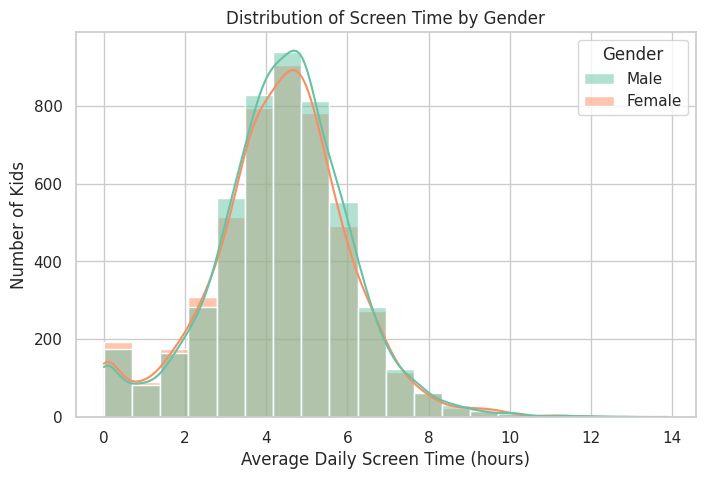

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="Avg_Daily_Screen_Time_hr",
    hue="Gender",
    kde=True,
    palette="Set2",
    bins=20
)
plt.title("Distribution of Screen Time by Gender")
plt.xlabel("Average Daily Screen Time (hours)")
plt.ylabel("Number of Kids")
plt.show()

**Stacked Bar Plot of Device Usage by Location**

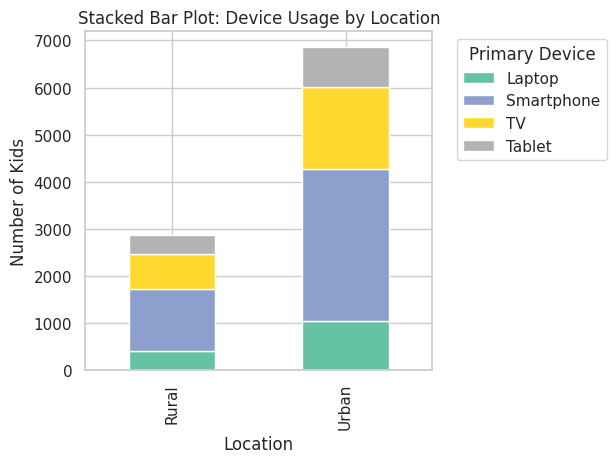

In [ ]:
device_location = pd.crosstab(df["Urban_or_Rural"], df["Primary_Device"])
device_location.plot(
    kind='bar',
    stacked=True,
    colormap="Set2"
)
plt.title("Stacked Bar Plot: Device Usage by Location")
plt.xlabel("Location")
plt.ylabel("Number of Kids")
plt.legend(title="Primary Device", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Swarmplot and Stripplot of Screen Time by Gender**

/tmp/ipython-input-1015604429.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 83.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 82.6% of the points

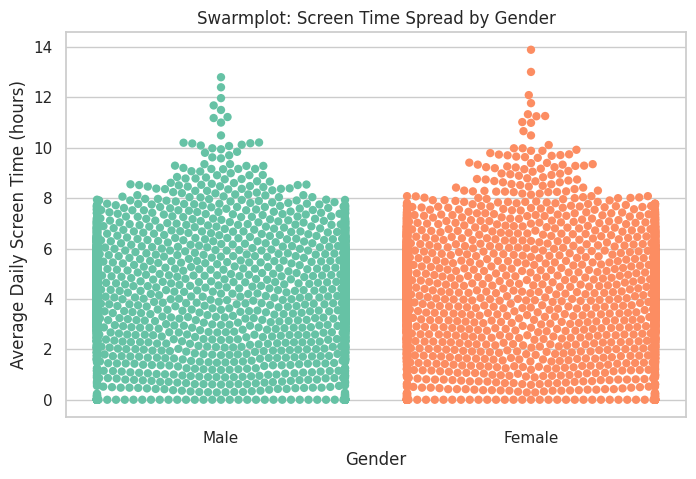

/tmp/ipython-input-1015604429.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


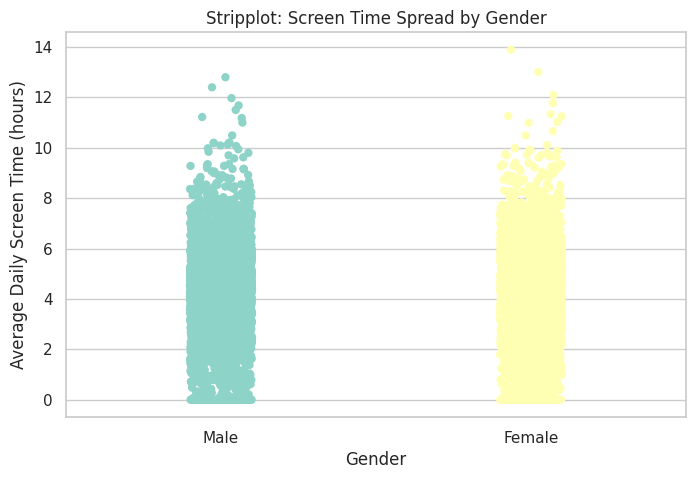

In [ ]:

plt.figure(figsize=(8,5))
sns.swarmplot(
    data=df,
    x="Gender",
    y="Avg_Daily_Screen_Time_hr",
    palette="Set2",
    size=6
)
plt.title("Swarmplot: Screen Time Spread by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Daily Screen Time (hours)")
plt.show()
plt.figure(figsize=(8,5))
sns.stripplot(
    data=df,
    x="Gender",
    y="Avg_Daily_Screen_Time_hr",
    palette="Set3",
    jitter=True,
    size=6
)
plt.title("Stripplot: Screen Time Spread by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Daily Screen Time (hours)")
plt.show()


#Box Plot and Bar Plot of Screen Time
The first plot shows the distribution of average daily screen time by gender, highlighting the median, quartiles, and outliers for males and females.  

The second plot shows the average daily screen time for each primary device, allowing comparison of screen usage across devices.  

Together, these plots help understand both the spread of screen time by gender and the differences in usage based on device type.

/tmp/ipython-input-3098548247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3098548247.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


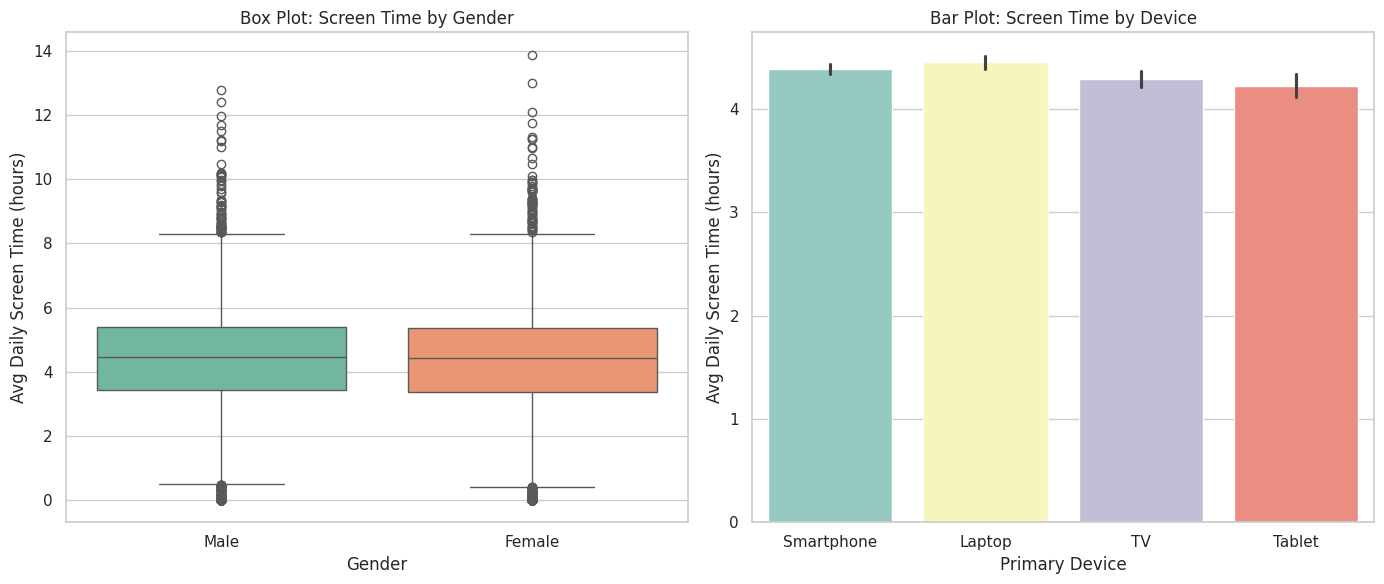

In [ ]:

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(
    data=df,
    x="Gender",
    y="Avg_Daily_Screen_Time_hr",
    palette="Set2",
    ax=axes[0]
)
axes[0].set_title("Box Plot: Screen Time by Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Avg Daily Screen Time (hours)")
sns.barplot(
    data=df,
    x="Primary_Device",
    y="Avg_Daily_Screen_Time_hr",
    palette="Set3",
    ax=axes[1]
)
axes[1].set_title("Bar Plot: Screen Time by Device")
axes[1].set_xlabel("Primary Device")
axes[1].set_ylabel("Avg Daily Screen Time (hours)")
plt.tight_layout()
plt.show()
